❗ Оставлены рекомендации ревьюера

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки

* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — сколько лет человек является клиентом банка
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата

Целевой признак

* *Exited* — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса" data-toc-modified-id="Исследование-баланса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-и-уменьшение-выборок" data-toc-modified-id="Увеличение-и-уменьшение-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение и уменьшение выборок</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle


df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В признаке Tenure (сколько лет пользователь является клиентом банка) есть пропуски. Скорее всего такие пользователи только пришли, поэтому стажа для подсчёта лет в базе у них ещё недостаточно. Заменим пропуски на нули.

In [ ]:
df['Tenure'] = df['Tenure'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Заодно сделаем этот столбец целочисленным для экономии памяти

In [ ]:
df['Tenure'] = df['Tenure'].astype('int64')

Проверим данные на явные дубликаты

In [ ]:
df.duplicated().sum()

0

Здесь чисто.
Остальные данные выглядят адекватными.  

Дальше немного уменьшим таблицу: нас интересует уйдёт ли клиент из банка, но на это вряд ли влияют столбцы с фамилией,  идентификатором строки в данных и ID пользователя. Избавимся от этих столбцов.

In [ ]:
df = df.drop(['Surname','RowNumber', 'CustomerId'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Дальше воспользуемся техникой прямого кодирования (OHE), чтобы преобразовать категориальные признаки в численные. Также проставим аргумент drop_first = True, чтобы один из столбцов наших фиктивных переменных для каждого признака был сброшен(это нужно чтобы не угодить в так называемую дамми-ловушку, когда фиктивных признаков слишком много).

In [ ]:
df = pd.get_dummies(df, drop_first=True)

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


Дальше перейдём к разделению на выборке и масштабированию признаков

Дальше разделим данные с помощью train_test_split() на выборки: обучающая+валидационная и тестовая. Потом одну из выборки снова разделим на обучающую и валидационную. У нас получится соотношение 3:1:1

In [ ]:
df_train_first, df_test = train_test_split(df, test_size=0.2, random_state=12345)

In [ ]:
df_train, df_valid = train_test_split(df_train_first, test_size=0.25, random_state=12345)

<div class='alert alert-success'> ✔️Корректное разделение на 3 выборки, если знаешь про дисбаланс, советую еще рассмотреть параметр stratify (https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-vyborok-v-usloviiah-disbalansa-klassov-625654c41dd29a5c65819c90).
</div>

In [ ]:
df_valid.shape

(2000, 12)

In [ ]:
df_train.shape

(6000, 12)

In [ ]:
df_test.shape

(2000, 12)

Дальше мы объявим переменные с признаками для обучения (target_train и features_train) и для проверки на валидационной выборке (target_valid и features_valid). Целевой признак — Exited.

In [ ]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

Теперь проведём масштабирование признаков методом StandardScaler.

В переменную запишем численные признаки, которые будем масшатбировать

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']


In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

Теперь можем переходить к исследованию

## Исследование задачи

### Исследование баланса

In [ ]:
class_frequency = df['Exited'].value_counts(normalize=True)
print(class_frequency)

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

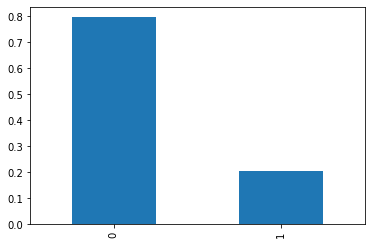

In [ ]:
class_frequency.plot(kind='bar')

Около 80% клиентов в датафрейме из банка не ушли: классы не сбалансированы.
Баланс классов (англ. class balance) наблюдается, если их количество примерно равно, поэтому нам нужно стремиться к соотношению классов близко равному к 1:1.

Попробуем обучить модель, несмотря на дисбаланс.

Попробуем обучить различные классификационные модели без учёта дисбаланса классов.

### Решающее дерево

Гиперпараметры для настройки модели:
* max_depth - максимальная глубина древа
* min_samples_split - минимальное количество объектов в узле
* min_samples_leaf - минимальное количество объектов в листе


Так как у нас модель классификации, будем использовать F1-меру для оценки.
  
Напишем функцию, которая будет на вход принимать переменные с признаками для обучения и для проверки на валидационной выборке. Внутри функции обучается модель решающего дерева DecisionTreeClassifier с различными сочетаниями гиперпараметров, считается метрика качества F1 и выбирается наилучший результат, значение метрики и параметры которого выводятся на экран.

cw - параметр class_weight для модели решающего дерева, пока передадим ему значение None


In [ ]:
def tree_f1(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_f1 = 0

    # проходим в циклах по всем выбранным гиперпараметрам
    for depth in range(2, 10):
        for samp_split in range(2, 10):
            for samp_leaf in range(1, 10):
                model_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=depth,
                                                      min_samples_split=samp_split,
                                                      min_samples_leaf=samp_leaf,
                                                      class_weight=cw)
                # обучение модели
                model_tree.fit(features_train, target_train)
                # поиск предсказаний модели
                predictions = model_tree.predict(features_valid)
                # вычисление f1 модели
                f1 = f1_score(target_valid, predictions)
                # если текущее значение метрики f1 выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику f1
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = [depth, samp_split, samp_leaf]

    # вывод наилучшей метрики f1 и параметров модели.
    print('Наилучшая метрика f1:', best_f1)
    print('Наилучшая глубина:', best_params[0])
    print('Минимальное кол-во объектов для создания узла:', best_params[1])
    print('Минимальное кол-во объектов в листе:', best_params[2])

In [ ]:
%%time
tree_f1(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.5665101721439749
Наилучшая глубина: 7
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 8
CPU times: user 8.79 s, sys: 8.03 ms, total: 8.8 s
Wall time: 8.81 s


Оценка неплоха, близка к оценке, к которой мы стремимся.  

Теперь напишем аналогичную функцию, только в ней поситаем метрику roc_auc

In [ ]:
def tree_roc_auc(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_roc_auc = 0.5

    # проходим в циклах по всем выбранным гиперпараметрам
    for depth in range(2, 10):
        for samp_split in range(2, 10):
            for samp_leaf in range(1, 10):
                model_tree = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=depth,
                                                      min_samples_split=samp_split,
                                                      min_samples_leaf=samp_leaf,
                                                      class_weight=cw)
                # обучение модели
                model_tree.fit(features_train, target_train)
                probabilities_valid = model_tree.predict_proba(features_valid)
                # вычисление roc_auc модели
                probabilities_one_valid = probabilities_valid[:, 1]
                roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
                # если текущее значение метрики roc_auc выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику roc_auc
                if roc_auc > best_roc_auc:
                    best_roc_auc = roc_auc
                    best_params = [depth, samp_split, samp_leaf]

    # вывод наилучшей метрики roc_auc и параметров модели.
    print('Наилучшая метрика roc_auc:', best_roc_auc)
    print('Наилучшая глубина:', best_params[0])
    print('Минимальное кол-во объектов для создания узла:', best_params[1])
    print('Минимальное кол-во объектов в листе:', best_params[2])

In [ ]:
%%time
tree_roc_auc(features_train, features_valid, target_train, target_valid)

Наилучшая метрика roc_auc: 0.8353077875568851
Наилучшая глубина: 7
Минимальное кол-во объектов для создания узла: 9
Минимальное кол-во объектов в листе: 4
CPU times: user 8.75 s, sys: 19.5 ms, total: 8.77 s
Wall time: 8.78 s


Наилучшее значение мы получили от модели с такими же надстройками как модель с лучшим F1.  
Эта метрика выше 0.5, а значит проходит проверку на адекватность. Но нам нужно стремиться к 1.

### Случайный лес

Гиперпараметры для настройки модели:
* n_estimators - количество деревьев
* max_depth - максимальная глубина дерева
* min_samples_split - минимальное количество объектов в узле
* min_samples_leaf - минимальное количество объектов в листе

Снова пишем две функции, которая будет на вход принимать переменные с признаками для обучения и для проверки на валидационной выборке. Внутри функций обучается модель случайного леса RandomForestClassifier с различными сочетаниями гиперпараметров. В одной функции считается метрика качества F1, во второй ROC_AUC и выбираются наилучшие результаты, значение метрики и параметры которого выводятся на экран.

In [ ]:
def forest_f1(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_f1 = 0

    # проходим в циклах по всем выбранным гиперпараметрам
    for n_estimators in range(30, 50, 10):
        for depth in range(15, 20, 2):
            for samp_split in range(2, 5):
                for samp_leaf in range(1, 7):
                    model_forest = RandomForestClassifier(random_state=12345,
                                                          max_depth=depth,
                                                          min_samples_split=samp_split,
                                                          min_samples_leaf=samp_leaf,
                                                          n_estimators=n_estimators,
                                                          class_weight=cw)
                    # обучение модели
                    model_forest.fit(features_train, target_train)
                    # поиск предсказаний модели
                    predictions = model_forest.predict(features_valid)
                    # вычисление f1 модели
                    f1 = f1_score(target_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_f1 = f1
                        best_params = [depth, samp_split, samp_leaf, n_estimators]

    # вывод наилучшей метрики f1 и параметров модели.
    print('Наилучшая метрика f1:', best_f1)
    print('Наилучшая глубина:', best_params[0])
    print('Минимальное кол-во объектов для создания узла:', best_params[1])
    print('Минимальное кол-во объектов в листе:', best_params[2])
    print('Количество деревьев:', best_params[3])

In [ ]:
%%time
forest_f1(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.5788617886178863
Наилучшая глубина: 15
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 4
Количество деревьев: 30
CPU times: user 22.8 s, sys: 91.6 ms, total: 22.9 s
Wall time: 22.9 s


F1 на 1% лучше, чем у решающего дерева, но всё равно ещё не дотягивает до значения по ТЗ.

In [ ]:
def forest_roc_auc(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_roc_auc = 0.5

    # проходим в циклах по всем выбранным гиперпараметрам
    for n_estimators in range(30, 50, 10):
        for depth in range(15, 20, 2):
            for samp_split in range(2, 5):
                for samp_leaf in range(1, 7):
                    model_forest = RandomForestClassifier(random_state=12345,
                                                          max_depth=depth,
                                                          min_samples_split=samp_split,
                                                          min_samples_leaf=samp_leaf,
                                                          n_estimators=n_estimators,
                                                          class_weight=cw)
                    # обучение модели
                    model_forest.fit(features_train, target_train)
                    probabilities_valid = model_forest.predict_proba(features_valid)
                    # вычисление roc_auc модели
                    probabilities_one_valid = probabilities_valid[:, 1]
                    roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику f1
                    if roc_auc > best_roc_auc:
                        best_roc_auc = roc_auc
                        best_params = [depth, samp_split, samp_leaf, n_estimators]

    # вывод наилучшей метрики f1 и параметров модели.
    print('Наилучшая метрика roc_auc:', best_roc_auc)
    print('Наилучшая глубина:', best_params[0])
    print('Минимальное кол-во объектов для создания узла:', best_params[1])
    print('Минимальное кол-во объектов в листе:', best_params[2])
    print('Количество деревьев:', best_params[3])

In [ ]:
%%time
forest_roc_auc(features_train, features_valid, target_train, target_valid)

Наилучшая метрика roc_auc: 0.853450619040277
Наилучшая глубина: 15
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 4
Количество деревьев: 40
CPU times: user 23.3 s, sys: 104 ms, total: 23.4 s
Wall time: 24.2 s


Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.​ Эта метрика у леса немного лучше, чем у решающего дерева.

### Логистическая регрессия

Здесь будем перебирать только один гиперпараметр max_iter (максимальное количество итераций обучения).

In [ ]:
def log_reg_f1(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_f1 = 0

    # проходим в циклах по всем выбранным гиперпараметрам
    for max_iter in range(100, 1000, 100):
        model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter, class_weight=cw)
                    # обучение модели
        model_log_reg.fit(features_train, target_train)
                    # поиск предсказаний модели
        predictions = model_log_reg.predict(features_valid)
                    # вычисление f1 модели
        f1 = f1_score(target_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику f1
        if f1 > best_f1:
            best_f1 = f1
            best_params = max_iter

    # вывод наилучшей метрики f1 и параметров модели.
    print('Наилучшая метрика f1:', best_f1)
    print('Оптимальное количество итераций:', best_params)

In [ ]:
%%time
log_reg_f1(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.3056603773584906
Оптимальное количество итераций: 100
CPU times: user 1.37 s, sys: 1.37 s, total: 2.74 s
Wall time: 2.76 s


In [ ]:
def log_reg_roc_auc(features_train, features_valid, target_train, target_valid, cw=None):

    best_params = []
    best_roc_auc = 0

    # проходим в циклах по всем выбранным гиперпараметрам
    for max_iter in range(100, 1000, 100):
        model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter, class_weight=cw)
                    # обучение модели
        model_log_reg.fit(features_train, target_train)
                    # поиск предсказаний модели
        probabilities_valid = model_log_reg.predict_proba(features_valid)
                    # вычисление roc_auc модели
        probabilities_one_valid = probabilities_valid[:, 1]
        roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, сохраняем параметры модели и текущую метрику f1
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params = max_iter

    # вывод наилучшей метрики f1 и параметров модели.
    print('Наилучшая метрика roc_auc:', best_roc_auc)
    print('Оптимальное количество итераций:', best_params)

In [ ]:
%%time
log_reg_roc_auc(features_train, features_valid, target_train, target_valid)

Наилучшая метрика roc_auc: 0.770792171274433
Оптимальное количество итераций: 100
CPU times: user 1.34 s, sys: 1.3 s, total: 2.65 s
Wall time: 2.58 s


Эта модель показала самые худшие результаты.

### Вывод

1. Обучили модели: Решающее дерево, Случайный лес, Логистическая регрессия без учёта дисбаланса классов.   
2. Максимальное значение метрики F1 = 0.58 получено при обучении модели случайного леса. Но качество модели пока ещё не удовлетворяет условию технического задания.  
3. Качество моделей дополнительно оценили по метрике ROC_AUC. Максимальное значение метрики — 0.85, тоже достигнуто при обучении модели случайного леса.  
4. Самой плохой моделью оказала Логистическая регрессия: она показала самые худшие результаты метрик. F1 = 0.30, ROC_AUC = 0.77.  
5. Метрики F1 и ROC_AUC достигли максимальных значений при одинаковых настройках гиперпараметров (но такой результат получается не всегда).

<div class="alert alert-info">

Сделано во всех моделях, выводы тоже подогнала под результаты
</div>

## Борьба с дисбалансом

Для борьбы с дисбалансом классов попробуем:

* взвешивание классов (class_weight='balanced')
* увеличение выборки положительного класса (upsampling)
* уменьшение выборки отрицательного класса (downsampling)


### Взвешивание классов

**Дерево решений:**

In [ ]:
tree_f1(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.5622489959839357
Наилучшая глубина: 7
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 3


In [ ]:
tree_roc_auc(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика roc_auc: 0.8332668382293336
Наилучшая глубина: 5
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 9


**Случайный лес:**

In [ ]:
forest_f1(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.6113989637305699
Наилучшая глубина: 19
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 4
Количество деревьев: 40


In [ ]:
forest_roc_auc(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика roc_auc: 0.8535030733454243
Наилучшая глубина: 15
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 6
Количество деревьев: 40


После придания редким объектам веса у решающего дерева ничего особо не поменялось, а вот у случайного леса метрики вырасли на 4%

### Увеличение и уменьшение выборок

Напишем функции для увеличения и уменьшения выборок

* features - признаки
* target - целевой признак
* repeat (int) - множитель для повторения признаков
* features_upsampled - увеличенная выборка признаков
* target_upsampled - увеличенная выборка целевого признака
* features_zeros — признаки объектов с ответом «0»;
* target_zeros — целевой признак объектов, у которых ответы только «0»;
* target_ones — целевой признак объектов, у которых ответы только «1».
  
Функция разделяет признаки по классам целевого признака (0, 1),повторяет признаки целевого положительного класса repeat раз, объединяет объекты с разными целевыми признаками методом concat, перемешивает объекты методом shuffle


In [ ]:
target = df_train_first['Exited']
features = df_train_first.drop('Exited', axis=1)

def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

* features - признаки
* target - целевой признак
* fraction - доля объектов для сэмплирования
* features_downsampled - уменьшенная выборка признаков
* target_downsampled - уменьшенная выборка целевого признака

In [ ]:
def downsample(features, target, fraction):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Исходное соотношение значений целевого признака 4:1.  
Для обучающей выборки увеличим количество объектов класса «1» в 2 раза, уменьшим количество объектов класса «0» в 1.5 раза.

In [ ]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)
features_train_balanced, target_train_balanced = downsample(features_train_upsampled, target_train_upsampled, 0.75)


Обучим модели случайного леса и решающего дерева, как самые точные, на сбалансированных обучающих выборках.

In [ ]:
tree_f1(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика f1: 0.5899280575539568
Наилучшая глубина: 8
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 5


In [ ]:
tree_roc_auc(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика roc_auc: 0.8349867036284073
Наилучшая глубина: 5
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 8


In [ ]:
forest_f1(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика f1: 0.6126582278481012
Наилучшая глубина: 19
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 4
Количество деревьев: 40


In [ ]:
forest_roc_auc(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика roc_auc: 0.8518499679710834
Наилучшая глубина: 17
Минимальное кол-во объектов для создания узла: 2
Минимальное кол-во объектов в листе: 4
Количество деревьев: 40


Наилучший результат для решающего дерева достигнут при увеличении положительного класса тренировочной выборки в 2 раза и сэмплировании отрицательного класса с коэффициентом 0.55. При этом метрика f1 = 0.604 а roc_auc = 0.834, что удовлетворяет условиям технического задания.

### Вывод

* Метрика F1 для модели Случайный лес достигла значения 0.61 на сбалансированной выборке, что удовлетворяет условию технического задания (>0.59).
* Для модели Решающее дерево метрика F1 также достигла минимально допустимого значения (0.59).
* Наилучшие значения метрик f1 и roc_auc получились на обеих моделях при одинаковых значениях гиперпараметров. Для решающего дерева оптимальные значения гиперпараметров различаются.
* Максимальное значение метрики ROC_AUC почти одинаковое у обеих моделей

## Тестирование модели

1. Обучим обе модели на всех доступных данных (обучающие + валидационные), предварительно сбалансировав классы.
2. Вычислим метрики f1 и roc_auc на тестовой выборке.

In [ ]:
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

### Решающее дерево

In [ ]:
%%time

features_upsampled, target_upsampled = upsample(features, target, 2)
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.75)


model_tree_final = DecisionTreeClassifier(random_state=12345,
                                         max_depth=8,
                                         min_samples_split=2,
                                         min_samples_leaf=7)
model_tree_final.fit(features_balanced, target_balanced)
predictions = model_tree_final.predict(features_test)
f1 = f1_score(target_test, predictions)

probabilities_test = model_tree_final.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
roc_auc = roc_auc_score(target_test, probabilities_one_test)

print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.63, 
 roc_auc = 0.84
CPU times: user 52.4 ms, sys: 5 µs, total: 52.4 ms
Wall time: 50.7 ms


### Случайный лес

In [ ]:
%%time

features_upsampled, target_upsampled = upsample(features, target, 2)
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.75)


model_forest_final = RandomForestClassifier(random_state=12345,
                                         n_estimators=30,
                                         max_depth=15,
                                         min_samples_split=2,
                                         min_samples_leaf=5)
model_forest_final.fit(features_balanced, target_balanced)
predictions = model_forest_final.predict(features_test)
f1 = f1_score(target_test, predictions)

probabilities_test = model_forest_final.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
roc_auc = roc_auc_score(target_test, probabilities_one_test)

print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.64, 
 roc_auc = 0.86
CPU times: user 255 ms, sys: 0 ns, total: 255 ms
Wall time: 253 ms


### Вывод

Удовлетворяющее техническому заданию значение метрики f1 (на тестовой выборке) удалось получить на двух моделях:
* Случайный лес F1 = 0.63 ROC_AUC = 0.77
* Решающее дерево F1 = 0.62 ROC_AUC = 0.77
  
При этом оьбе метрики выше у модели Случайный лес.


## Общий вывод

1. Перед исследованием категориальные признаки были преобразованы методом One-Hot Encoder, а количественные масштабированы методом StandardScaler.
2. Пропуски в признаке Tenure заполнили нулями.
3. Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
4. Данные были изначально несбалансированы: целевой признак распределён в сооотношении 4:1.
5. Проведён анализ моделей без учёта дисбаланса классов:
    * Обучены модели Решающее Дерево, Случайный лес, Логистическая Регрессия без учёта дисбаланса классов. Максимальное значение метрики F1 = 0.57 получено при обучении модели случайного леса. Хуже всего себя показала Логистическая регрессия (F1 = 0.30).
    * Качество моделей также оценено по метрике ROC_AUC. Максимальное значение метрики ROC_AUC = 0.85 достигнуто при обучении модели Cлучайного леса. Самое низкое значение снова у Логистической регрессии — 0.77

6. Проведён анализ дисбаланса классов
    * Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики F1, для Дерева решений. А у Случайного леса удалось набрать требуемый порог — 0.60
    * Увеличение выборки положительного класса и уменьшение выборки отрицательного класса дали необходимый прирост точности моделей.
        * Необходимое значение F1 на валидационной выборке получила модель:  
            **Случайный лес:**
                F1 = 0.61
                ROC_AUC = 0.75
7. Проведено тестирование обеих моделей на тестовой выборке:
    * Значение метрики F1 на тестовой выборке:  
        **Случайный лес:**
                F1 = 0.64
                ROC_AUC = 0.86
        **Решающее дерево:**
                F1 = 0.63
                ROC_AUC = 0.84
        На тестовой выборке модель Решающее дерево показало себя лучше, чем на валидационной и увеличила метрику F1 на 3%, а ROC_AUC у обеих моделей так и отличается на "%.


**Если выбирать одну из моделей, то я бы выбрала Решающее дерево: порог требуемой F1-меры оно прошло, ROC_AUC у него почти такой же как у Случайного леса. Поэтому сейчас решающее значение в выборе играет скорость модели: у дерева она ощутимо выше, чем у леса.**